# Data Exploring
The target of this notebook is to explore the dataset, preprocess the data and create some new features which would be used later.

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

from tqdm import tqdm

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

#忽略警告
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

from scipy import stats
from scipy.special import boxcox1p
from scipy.stats import norm, skew

from sklearn.preprocessing import LabelEncoder

## Read in dataset

In [2]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## Data Exploration and Visualization

- portfolio

In [3]:
print('The shape of portfolio data:', portfolio.shape)
portfolio

The shape of portfolio data: (10, 6)


,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2


In [4]:
channels = ['web', 'email', 'mobile', 'social']
for channel in channels:
    portfolio[channel] = 0

for i in range(portfolio.shape[0]):
    for channel in channels:
        if channel in portfolio.loc[i, 'channels']:
            portfolio.loc[i, channel] = 1

portfolio

,channels,difficulty,duration,id,offer_type,reward,web,email,mobile,social
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0,1,1,1
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,1,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,1,0
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0
5,"[web, email, mobile, social]",7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,"[web, email, mobile, social]",10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,"[email, mobile, social]",0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,1,1,1
8,"[web, email, mobile, social]",5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,"[web, email, mobile]",10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,1,0


In [5]:
portfolio.drop('channels', axis=1, inplace=True)
portfolio.rename(columns={'id': 'offer_id'}, inplace=True)
portfolio

,difficulty,duration,offer_id,offer_type,reward,web,email,mobile,social
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0,1,1,1
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,1,0
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,1,0
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,1,0,0
5,7,7,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,3,1,1,1,1
6,10,10,fafdcd668e3743c1bb461111dcafc2a4,discount,2,1,1,1,1
7,0,3,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,1,1,1
8,5,5,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,1,1,1,1
9,10,7,2906b810c7d4411798c6938adc9daaa5,discount,2,1,1,1,0


- profile

In [6]:
print('The shape of profile data:', profile.shape)
profile.head()

The shape of profile data: (17000, 5)


,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,nan
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.00
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,nan
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.00
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,nan


In [7]:
profile.duplicated().sum()

0

In [8]:
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

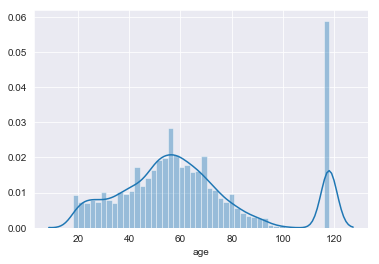

In [9]:
sns.distplot(profile['age']);

In [10]:
profile[(profile['age'] > 100) & (profile['gender'].isnull()==True) & (profile['income'].isnull()==True)].shape[0]

2175

Age in rows where gender and income are unknonwn is recorded as 118, which means 118 is not the real age.

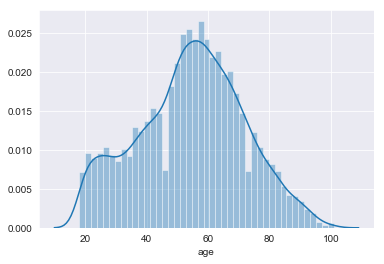

In [11]:
sns.distplot(profile.loc[profile['age'] != 118]['age']);

In [12]:
# Replace 118 in age column as median of age
age_median = int(profile['age'].median())
profile['age'] = profile['age'].apply(lambda x: age_median if x== 118 else x)

In [13]:
# Create new feature "inform_unknown" and fill null in gender with "U"
profile['inform_unknown'] = profile['gender'].apply(lambda x: 1 if pd.isnull(x)==True else 0)
profile['gender'].fillna('U', inplace=True)  # 'U' means 'Unknown'

profile.head()

,age,became_member_on,gender,id,income,inform_unknown
0,58,20170212,U,68be06ca386d4c31939f3a4f0e3dd783,nan,1
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.00,0
2,58,20180712,U,38fe809add3b4fcf9315a9694bb96ff5,nan,1
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.00,0
4,58,20170804,U,a03223e636434f42ac4c3df47e8bac43,nan,1


In [14]:
profile.dtypes

age                   int64
became_member_on      int64
gender               object
id                   object
income              float64
inform_unknown        int64
dtype: object

In [15]:
# Create new features from "became_member_on"
profile['became_member_on'] = profile['became_member_on'].astype('str')
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile['became_member_year'] = profile['became_member_on'].dt.year
profile['member_years'] = 2018 - profile['became_member_year']
profile.head()

,age,became_member_on,gender,id,income,inform_unknown,became_member_year,member_years
0,58,2017-02-12,U,68be06ca386d4c31939f3a4f0e3dd783,nan,1,2017,1
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.00,0,2017,1
2,58,2018-07-12,U,38fe809add3b4fcf9315a9694bb96ff5,nan,1,2018,0
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.00,0,2017,1
4,58,2017-08-04,U,a03223e636434f42ac4c3df47e8bac43,nan,1,2017,1


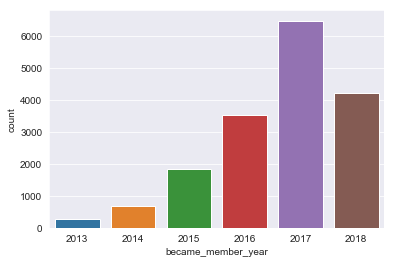

In [16]:
sns.countplot(x = "became_member_year", data = profile);

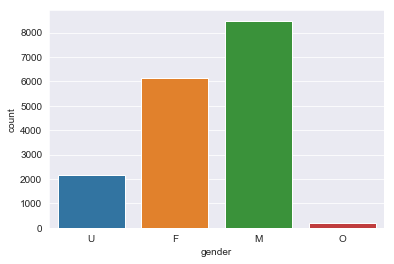

In [17]:
sns.countplot(x = "gender", data = profile);

In [18]:
profile.rename(columns={'id': 'user_id'}, inplace=True)

In [19]:
profile['income'].describe()

count    14825.00
mean     65404.99
std      21598.30
min      30000.00
25%      49000.00
50%      64000.00
75%      80000.00
max     120000.00
Name: income, dtype: float64

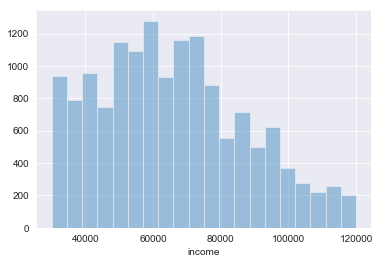

In [20]:
sns.distplot(profile['income'].dropna(), bins=20, kde=False);

In [21]:
# Fill null in income column with mean of income
profile['income'].fillna(profile['income'].mean(), inplace=True)
profile.head()

,age,became_member_on,gender,user_id,income,inform_unknown,became_member_year,member_years
0,58,2017-02-12,U,68be06ca386d4c31939f3a4f0e3dd783,65404.99,1,2017,1
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.00,0,2017,1
2,58,2018-07-12,U,38fe809add3b4fcf9315a9694bb96ff5,65404.99,1,2018,0
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.00,0,2017,1
4,58,2017-08-04,U,a03223e636434f42ac4c3df47e8bac43,65404.99,1,2017,1


In [22]:
profile.drop('became_member_on', axis=1, inplace=True)

- transcript

In [23]:
print('The shape of transcript data:', transcript.shape)
transcript.head()

The shape of transcript data: (306534, 4)


,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


In [24]:
transcript.isnull().sum()

event     0
person    0
time      0
value     0
dtype: int64

In [25]:
transcript.rename(columns={'person': 'user_id'}, inplace=True)

transcript['offer_id'] = transcript['value'].apply(lambda x: list(x.values())[0])
transcript.drop('value', axis=1, inplace=True)

transcript.head()

,event,user_id,time,offer_id
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,offer received,e2127556f4f64592b11af22de27a7932,0,2906b810c7d4411798c6938adc9daaa5
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,fafdcd668e3743c1bb461111dcafc2a4
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,4d5c57ea9a6940dd891ad53e9dbe8da0


In [26]:
transcript.duplicated().sum()

397

In [27]:
transcript.drop_duplicates(inplace=True)

In [28]:
transcript.duplicated().sum()

0

In [29]:
transcript['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

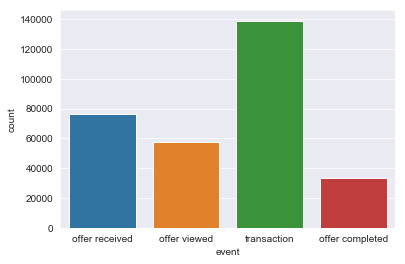

In [30]:
sns.countplot(x = "event", data = transcript);

In [31]:
transcript['time'].unique()

array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
        78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
       156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228,
       234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294, 300, 306,
       312, 318, 324, 330, 336, 342, 348, 354, 360, 366, 372, 378, 384,
       390, 396, 402, 408, 414, 420, 426, 432, 438, 444, 450, 456, 462,
       468, 474, 480, 486, 492, 498, 504, 510, 516, 522, 528, 534, 540,
       546, 552, 558, 564, 570, 576, 582, 588, 594, 600, 606, 612, 618,
       624, 630, 636, 642, 648, 654, 660, 666, 672, 678, 684, 690, 696,
       702, 708, 714], dtype=int64)

In [32]:
transcript['day'] = transcript['time'].apply(lambda x: int(np.ceil(x/24)))

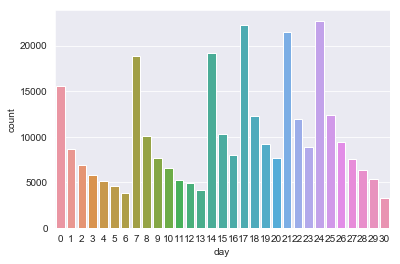

In [33]:
sns.countplot(x = "day", data = transcript);

In [34]:
transcript.loc[transcript['offer_id'].isin(portfolio['offer_id'].unique())==False]['event'].unique()

array(['transaction'], dtype=object)

Value in rows where event is "transaction" is a float number instead of offer id, which might represents transaction amout.

In [35]:
transcript['user_id'].value_counts().sort_values()[::-1][:10]

94de646f7b6041228ca7dec82adb97d2    51
8dbfa485249f409aa223a2130f40634a    49
79d9d4f86aca4bed9290350fb43817c2    48
5e60c6aa3b834e44b822ea43a3efea26    48
d0a80415b84c4df4908b8403b19765e3    47
a42ed50acc4d4b25bca647c9e0b916ad    46
28681c16026943e68f26feaccab0907f    46
b1f4ece7d49342628a9ed77aee2cde58    46
bd2cdd691aca4bb0a0e039979ee5de5c    46
ab25fd6fbd5040f880751921e4029757    44
Name: user_id, dtype: int64

In [36]:
# Look at data of a user
transcript[transcript['user_id']=='94de646f7b6041228ca7dec82adb97d2']

,event,user_id,time,offer_id,day
2276,offer received,94de646f7b6041228ca7dec82adb97d2,0,f19421c1d4aa40978ebb69ca19b0e20d,0
16010,offer viewed,94de646f7b6041228ca7dec82adb97d2,6,f19421c1d4aa40978ebb69ca19b0e20d,1
24531,transaction,94de646f7b6041228ca7dec82adb97d2,30,7.41,2
24532,offer completed,94de646f7b6041228ca7dec82adb97d2,30,f19421c1d4aa40978ebb69ca19b0e20d,2
42252,transaction,94de646f7b6041228ca7dec82adb97d2,102,1.47,5
55475,offer received,94de646f7b6041228ca7dec82adb97d2,168,9b98b8c7a33c4b65b9aebfe6a799e6d9,7
75256,offer viewed,94de646f7b6041228ca7dec82adb97d2,186,9b98b8c7a33c4b65b9aebfe6a799e6d9,8
77624,transaction,94de646f7b6041228ca7dec82adb97d2,192,2.62,8
81725,transaction,94de646f7b6041228ca7dec82adb97d2,204,0.59,9
93913,transaction,94de646f7b6041228ca7dec82adb97d2,246,2.28,11


## Create user transactions dataframe

In [37]:
transaction_df = transcript[transcript['event']=='transaction']
transaction_df['offer_id'] = transaction_df['offer_id'].astype(float)
transaction_df.rename(columns={'offer_id': 'transaction_value'}, inplace=True)
transaction_df.head()

,event,user_id,time,transaction_value,day
12654,transaction,02c083884c7d45b39cc68e1314fec56c,0,0.83,0
12657,transaction,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,34.56,0
12659,transaction,54890f68699049c2a04d415abc25e717,0,13.23,0
12670,transaction,b2f1cd155b864803ad8334cdf13c4bd2,0,19.51,0
12671,transaction,fe97aa22dd3e48c8b143116a8403dd52,0,18.97,0


In [38]:
transaction_count = transaction_df.groupby('user_id')['transaction_value'].count()
user_transactions = pd.DataFrame({'user_id': transaction_count.index, 'transaction_num': transaction_count.values})
user_transactions['transaction_sum'] = user_transactions['user_id'].apply(lambda x: transaction_df[transaction_df['user_id']==x]['transaction_value'].sum())
user_transactions['transaction_mean'] = user_transactions['transaction_sum'] / user_transactions['transaction_num']
user_transactions.head()

,user_id,transaction_num,transaction_sum,transaction_mean
0,0009655768c64bdeb2e877511632db8f,8,127.60,15.95
1,00116118485d4dfda04fdbaba9a87b5c,3,4.09,1.36
2,0011e0d4e6b944f998e987f904e8c1e5,5,79.46,15.89
3,0020c2b971eb4e9188eac86d93036a77,8,196.86,24.61
4,0020ccbbb6d84e358d3414a3ff76cffd,12,154.05,12.84


## Create user-offer dataframe

In [57]:
user_offer_df = transcript.loc[transcript['event']=='offer received'][['user_id', 'offer_id', 'time']]
user_offer_df.rename(columns={'time': 'offer_received_time'}, inplace=True)
user_offer_df.reset_index(inplace=True)

user_offer_df.head()

,index,user_id,offer_id,offer_received_time
0,0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
1,1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0
2,2,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,0
4,4,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,0


In [40]:
view_df = transcript.loc[transcript['event']=='offer viewed'][['user_id', 'offer_id', 'time']]
view_df.rename(columns={'time': 'offer_viewed_time'}, inplace=True)

view_df.head()

,user_id,offer_id,offer_viewed_time
12650,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,0
12651,d1ede868e29245ea91818a903fec04c6,5a8bc65990b245e5a138643cd4eb9837,0
12652,102e9454054946fda62242d2e176fdce,4d5c57ea9a6940dd891ad53e9dbe8da0,0
12653,02c083884c7d45b39cc68e1314fec56c,ae264e3637204a6fb9bb56bc8210ddfd,0
12655,be8a5d1981a2458d90b255ddc7e0d174,5a8bc65990b245e5a138643cd4eb9837,0


In [41]:
complete_df = transcript.loc[transcript['event']=='offer completed'][['user_id', 'offer_id', 'time']]
complete_df.rename(columns={'time': 'offer_completed_time'}, inplace=True)

complete_df.head()

,user_id,offer_id,offer_completed_time
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2906b810c7d4411798c6938adc9daaa5,0
12672,fe97aa22dd3e48c8b143116a8403dd52,fafdcd668e3743c1bb461111dcafc2a4,0
12679,629fc02d56414d91bca360decdfa9288,9b98b8c7a33c4b65b9aebfe6a799e6d9,0
12692,676506bad68e4161b9bbaffeb039626b,ae264e3637204a6fb9bb56bc8210ddfd,0
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,4d5c57ea9a6940dd891ad53e9dbe8da0,0


In [66]:
user_offer_df['offer_viewed_time'] = -1
user_offer_df['offer_completed_time'] = -1

for i in tqdm(range(user_offer_df.shape[0])):
    user_id, offer_id, offer_received_time = user_offer_df.loc[i][['user_id', 'offer_id', 'offer_received_time']]
    offer_viewed_times = view_df.loc[(view_df['user_id']==user_id)&(view_df['offer_id']==offer_id)&(view_df['offer_viewed_time']>offer_received_time)]['offer_viewed_time'].tolist()
    if len(offer_viewed_times) > 0:
        user_offer_df.loc[i, 'offer_viewed_time'] = np.min(offer_viewed_times)
    offer_completed_times = complete_df.loc[(complete_df['user_id']==user_id)&(complete_df['offer_id']==offer_id)&(complete_df['offer_completed_time']>offer_received_time)]['offer_completed_time'].tolist()
    if len(offer_completed_times) > 0:
        user_offer_df.loc[i, 'offer_completed_time'] = np.min(offer_completed_times)

user_offer_df.head()

100%|██████████████████████████████████████████████████████████████████████████| 76277/76277 [1:12:26<00:00, 16.66it/s]


,index,user_id,offer_id,offer_received_time,offer_viewed_time,offer_completed_time
0,0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,6,132
1,1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,6,-1
2,2,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0,18,-1
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,0,12,-1
4,4,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,0,84,-1


In [68]:
user_offer_df['offer_view'] = user_offer_df['offer_viewed_time'].apply(lambda x: 0 if x == -1 else 1)
user_offer_df['offer_complete'] = user_offer_df['offer_completed_time'].apply(lambda x: 0 if x == -1 else 1)
user_offer_df.head()

,index,user_id,offer_id,offer_received_time,offer_viewed_time,offer_completed_time,offer_view,offer_complete
0,0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,6,132,1,1
1,1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,6,-1,1,0
2,2,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0,18,-1,1,0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,0,12,-1,1,0
4,4,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,0,84,-1,1,0


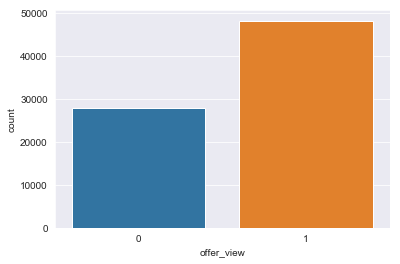

In [70]:
sns.countplot(x = "offer_view", data = user_offer_df);

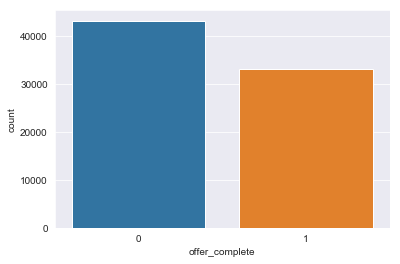

In [71]:
sns.countplot(x = "offer_complete", data = user_offer_df);

In [72]:
user_offer_df = user_offer_df.merge(portfolio, how='left', on='offer_id')
user_offer_df.head()

,index,user_id,offer_id,offer_received_time,offer_viewed_time,offer_completed_time,offer_view,offer_complete,difficulty,duration,offer_type,reward,web,email,mobile,social
0,0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,6,132,1,1,5,7,bogo,5,1,1,1,0
1,1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,6,-1,1,0,20,10,discount,5,1,1,0,0
2,2,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0,18,-1,1,0,10,7,discount,2,1,1,1,0
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,0,12,-1,1,0,10,10,discount,2,1,1,1,1
4,4,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,0,84,-1,1,0,10,5,bogo,10,1,1,1,1


In [74]:
user_offer_df['complete_time'] = -1
user_offer_df['complete_speed'] = 0
user_offer_df['view_time'] = -1
user_offer_df['view_speed'] = 0

for i in tqdm(range(user_offer_df.shape[0])):
    offer_received_time, offer_viewed_time, offer_completed_time, offer_complete, duration, offer_view = user_offer_df.loc[i][['offer_received_time', 'offer_viewed_time', 'offer_completed_time', 'offer_complete', 'duration', 'offer_view']]
    if offer_complete == 1:
        user_offer_df.loc[i, 'complete_time'] = offer_completed_time - offer_received_time
        user_offer_df.loc[i, 'complete_speed'] = 1 - (offer_completed_time - offer_received_time) / (duration * 24)
    if offer_view == 1:
        user_offer_df.loc[i, 'view_time'] = offer_viewed_time - offer_received_time
        user_offer_df.loc[i, 'view_speed'] = 1 - (offer_viewed_time - offer_received_time) / (duration * 24)

user_offer_df.head()

100%|███████████████████████████████████████████████████████████████████████████| 76277/76277 [08:11<00:00, 155.08it/s]


,index,user_id,offer_id,offer_received_time,offer_viewed_time,offer_completed_time,offer_view,offer_complete,difficulty,duration,offer_type,reward,web,email,mobile,social,complete_time,complete_speed,view_time,view_speed
0,0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,6,132,1,1,5,7,bogo,5,1,1,1,0,132,0.21,6,0.96
1,1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,6,-1,1,0,20,10,discount,5,1,1,0,0,-1,0.00,6,0.97
2,2,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0,18,-1,1,0,10,7,discount,2,1,1,1,0,-1,0.00,18,0.89
3,3,8ec6ce2a7e7949b1bf142def7d0e0586,fafdcd668e3743c1bb461111dcafc2a4,0,12,-1,1,0,10,10,discount,2,1,1,1,1,-1,0.00,12,0.95
4,4,68617ca6246f4fbc85e91a2a49552598,4d5c57ea9a6940dd891ad53e9dbe8da0,0,84,-1,1,0,10,5,bogo,10,1,1,1,1,-1,0.00,84,0.30


## Save the dataframe we created for later usage

In [76]:
portfolio.to_csv('data/portfolio.csv', index=False)
profile.to_csv('data/profile.csv', index=False)
transcript.to_csv('data/transcript.csv', index=False)
user_transactions.to_csv('data/user_transactions.csv', index=False)
user_offer_df.to_csv('data/user_offer_df.csv', index=False)